
# Naive Bayes and LDA


A comparison of Naive Bayes and LDA classifiers in scikit-learn on synthetic datasets.
The point of this example is to illustrate the nature of decision boundaries of different classifiers.



Import the libraries

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification, make_blobs
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## Define the datasets

**Q1: add a dataset generated with "make_blobs".**

**This dataset will contain 3 differents clusters (classes) in dimension 2.**

**The standard-deviation of each cluster will be 1.2.**

In [2]:
# Number of samples
N=500 

datasets = [make_moons(n_samples=N, noise=0.2, random_state=0),
            make_circles(n_samples=N, noise=0.1, factor=0.5, random_state=1),
            make_blobs(n_samples=N, centers=3, n_features=2, cluster_std=1.2, random_state=2)
            ]

### Plot the datasets

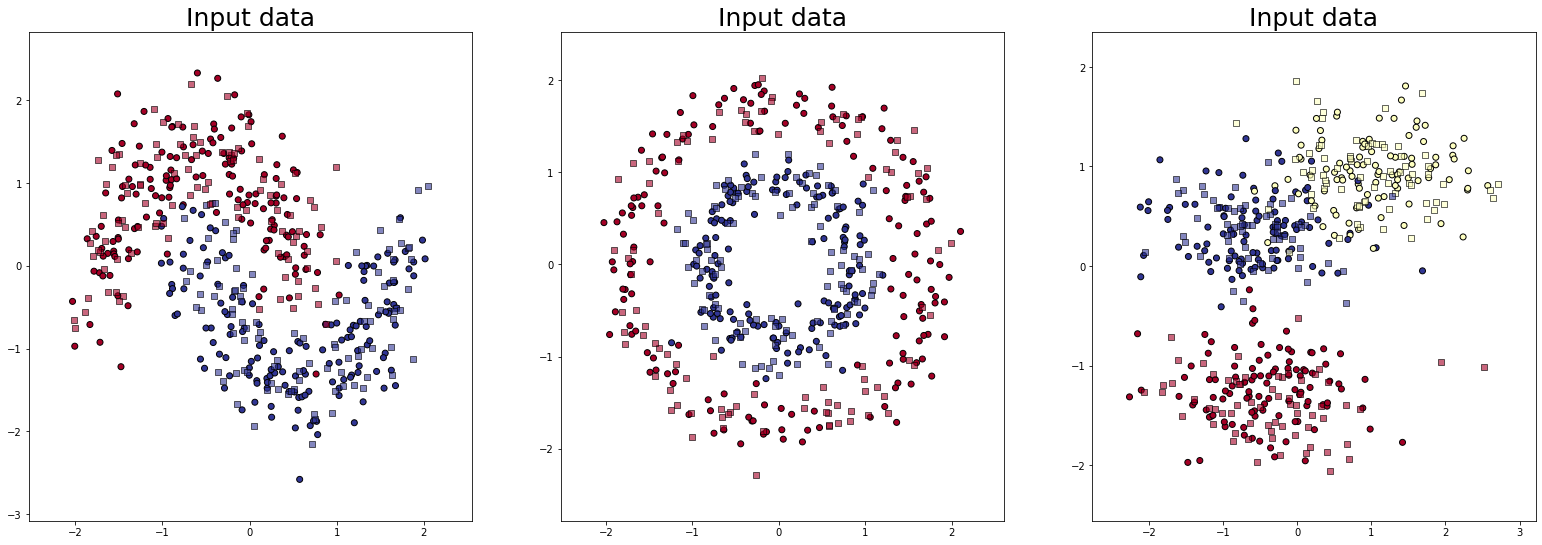

In [3]:
figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = plt.cm.RdYlBu
    ax = plt.subplot(1, len(datasets), i)
    ax.set_title("Input data", size=25)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k', marker ='s')
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    i += 1


## Define the models and the datasets

**Q2: add a second model to the following lists "names" and "classifiers": the LDA.**

In [4]:
names = ["Naive Bayes",
        "LDA"]

classifiers = [
    GaussianNB(),
    LinearDiscriminantAnalysis()]

### Plot the decision regions

**Q3: the following cell plot the decision regions. Compare the two classifiers and explain their difference.**

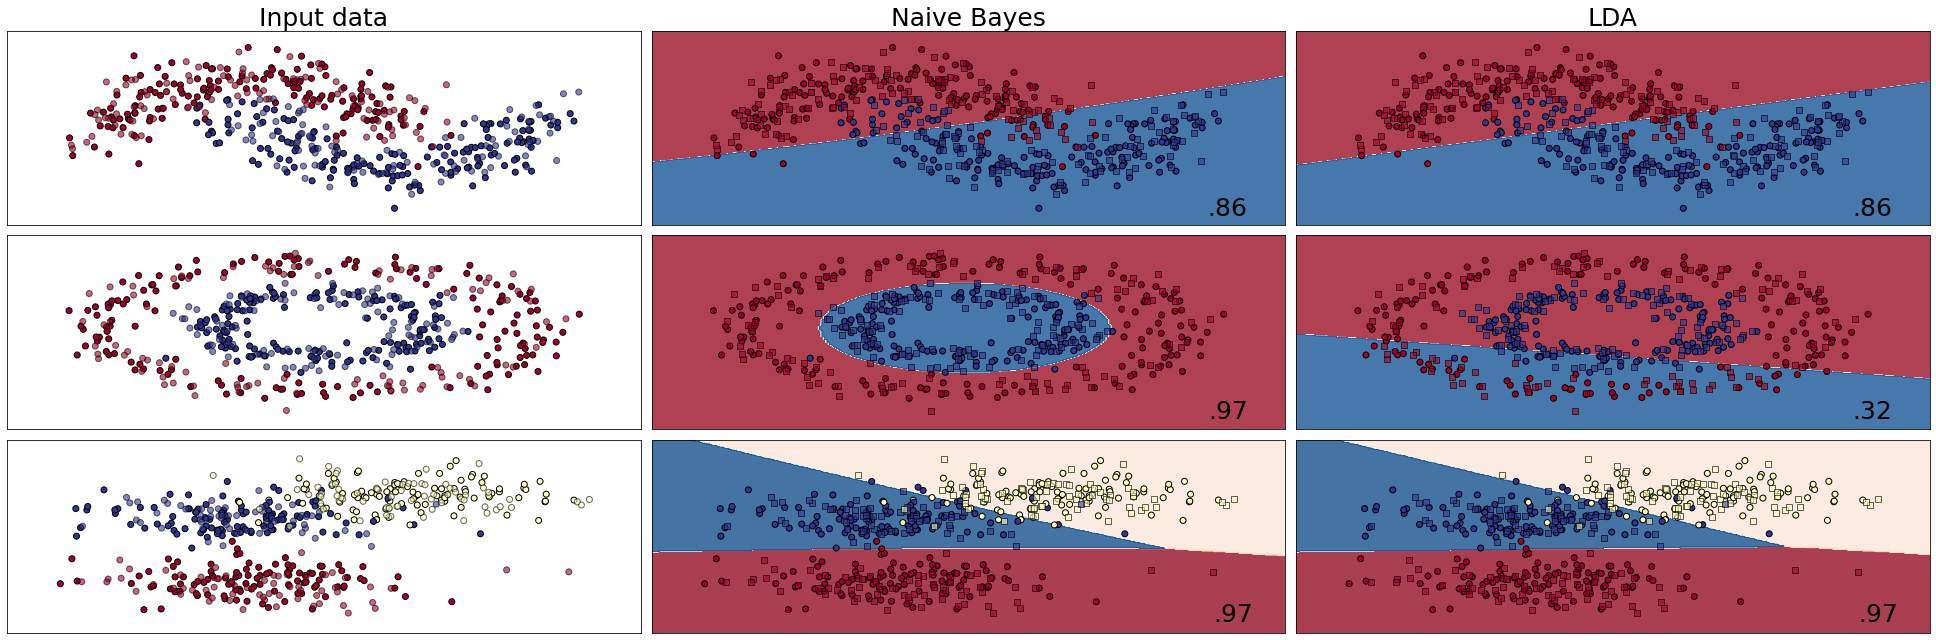

In [5]:
h = .02  # step size in the mesh

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = plt.cm.RdYlBu
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data", size=25)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.6, marker='s')

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name, size=25)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'), size=25, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

Elements of answer:
- Two moons: a moon does not follow a Gaussian distribution. The GaussianNB implements the Gaussian Naive Bayes algorithm for classification. Hence, it is not very relevant. The same comment holds for the LDA.
- Two circles:  a circle does not follow a Gaussian distribution. Hence, the LDA does not work correctly. The assumptions of the Gaussian naive Bayes classifier are also not satisfied but it works better since the centered circles allow the classifier to learn a circular contour. The LDA can not learn the contour because it is based on a linear expression of the decision function. 
- Blobs : a blob follows a Gaussian distribution. The GaussianNB implements the Gaussian Naive Bayes algorithm for classification. Hence, it is almost optimal for discriminating Gaussian blobs. It is similar to LDA since the LDA also assume a Gaussian distribution of the dataset.

### Cross-validation to evaluate the accuracies of the classifiers

**Q4: Evaluate the accuracy of the classification with a cross-validation.**
    
**Create a dataset with "make_blobs": 2 clusters in dimension 2, standard-deviation of each cluster of 5.1, 500 samples for the 1st blob, 50 samples for the 2nd blob.**

**Use a 10-fold cross-validation to test a GaussianNB classifier.**

**Print the 10 scores (the accuracy is the score).**

**Print the mean accuracy over the 10 folds and its standard-deviation.**

In [6]:
from sklearn.model_selection import cross_val_score

X, y = make_blobs(n_samples=[500, 50], centers=None, n_features=2, cluster_std=5.1, random_state=2)

clf = GaussianNB()

fold_number = 10
scores = cross_val_score(clf, X, y, cv=fold_number, scoring='accuracy') # By default, it is a stratifiedKFold

print(scores)

print("Mean accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.87272727 0.96363636 0.87272727 0.90909091 0.89090909 0.96363636
 0.92727273 0.92727273 0.89090909 0.90909091]
Mean accuracy: 0.91 (+/- 0.06)


**Q5: Evaluate the mean recall of the classification with the same cross-validation. What is the recall?**

Answer: The balanced accuracy in binary and multiclass classification problems to deal with imbalanced datasets. It is defined as the average of recall obtained on each class. The recall is the true positive rate.

In [7]:
scores_recall = cross_val_score(clf, X, y, cv=fold_number, scoring='recall')
print("Mean recall: %0.2f (+/- %0.2f)" % (scores_recall.mean(), scores_recall.std() * 2))

Mean recall: 0.26 (+/- 0.59)


**Q6: Evaluate the mean balanced accuracy of the classification with the same cross-validation. What is the balanced accuracy?**

In [8]:
scores_ba = cross_val_score(clf, X, y, cv=fold_number, scoring='balanced_accuracy')
print("Mean precision: %0.2f (+/- %0.2f)" % (scores_ba.mean(), scores_ba.std() * 2))

Mean precision: 0.62 (+/- 0.30)


The balanced accuracy in binary and multiclass classification problems is a score to deal with imbalanced datasets. It is defined as the average of recall obtained on each class.

**Q7: What is the specificity of a classfier? Based on the scores computed, give an approximation of the mean specificity of the classifier.**

Answer: The specificity is the true negative rate. It depends on the balanced accuracy and the recall.

In [9]:
specificity = 2*scores_ba.mean()-scores_recall.mean()
print(specificity)

0.978


**Q8: What is the main drawback of imbalanced datasets on the accuracy?**

Answer: the recall and the specificity are also strongly imbalanced. Hence, the accuracy may be high while the classifier poorly classifies the samples.

### GridSearch

**Q9: Use a grid search to select the best model.**
    
**Create a dataset with "make_blobs": 2 clusters in dimension 2, standard-deviation of each cluster of 3.5, 500 samples for the 1st blob, 50 samples for the 2nd blob.**

**Use a grid search to test some priors the GaussNB classifier. What is the prior parameter? You will start with the prior [0.05,0.95] and will finish with [0.95,0.05] with a step of 0.05 between two sucessive priors.**

**For each search, you will use a 10-fold cross-validation.**

**The score is the balanced accuracy.**

Hyper-parameter optimizers (GridSearch)

In [10]:
from sklearn.model_selection import GridSearchCV

# Make an imbalanced training set with 2 blobs
X, y = make_blobs(n_samples=[5000, 500], centers=None, n_features=2, cluster_std=3.5, random_state=2)

# Vector of probabilities
nb_p = 19 # number of probabilities to test
p = np.linspace(0.05,0.95,nb_p)
tuned_priors = [[x,1-x] for x in p]

tuned_parameters = [{'priors': tuned_priors}] # parameters to tune
n_folds = 10 # number of crossvalidation folds

# Gaussian Bayes model without fixing the parameter of interest
gaussnb = GaussianNB()

grid_search_ba  = GridSearchCV(gaussnb, tuned_parameters, cv=n_folds, scoring='balanced_accuracy')
grid_search_ba.fit(X, y)


GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid=[{'priors': [[0.05, 0.95], [0.1, 0.9], [0.15, 0.85],
                                     [0.2, 0.8], [0.25, 0.75], [0.3, 0.7],
                                     [0.35, 0.65],
                                     [0.39999999999999997, 0.6000000000000001],
                                     [0.44999999999999996, 0.55],
                                     [0.49999999999999994, 0.5],
                                     [0.5499999999999999, 0.45000000000000007],
                                     [0.6, 0.4], [0.65, 0.35],
                                     [0.7, 0.30000000000000004], [0.75, 0.25],
                                     [0.7999999999999999, 0.20000000000000007],
                                     [0.85, 0.15000000000000002],
                                     [0.9, 0.09999999999999998],
                                     [0.95, 0.050000000000000044]]}],
             scoring='balanced_accuracy')

**Q10: Plot the balanced accuracy of all the tested models as a function of the prior probability of the first class (blob 1). Comment the shape of the curve.**

Answer: the curve looks like a bell. Hence, it we choose correctly the prior, we can balance the recall and the precision.

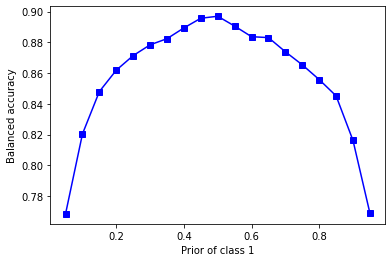

In [11]:
scores_mean_ba = grid_search_ba.cv_results_['mean_test_score']
plt.plot(p,scores_mean_ba,'b-s')
plt.xlabel('Prior of class 1')
plt.ylabel('Balanced accuracy')
plt.show()

**Q11: Plot the accuracy of all the tested models as a function of the prior probability of the first class (blob 1). Comment the shape of the curve.**

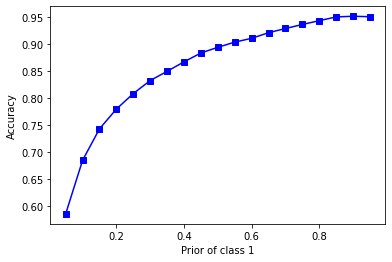

In [12]:
grid_search_acc  = GridSearchCV(gaussnb, tuned_parameters, cv=n_folds, scoring='accuracy')
grid_search_acc.fit(X, y)
scores_mean_acc = grid_search_acc.cv_results_['mean_test_score']
plt.plot(p,scores_mean_acc,'b-s')
plt.xlabel('Prior of class 1')
plt.ylabel('Accuracy')
plt.show()

**Q12: Plot the recall of all the tested models as a function of the prior probability of the first class (blob 1). Comment the shape of the curve.**

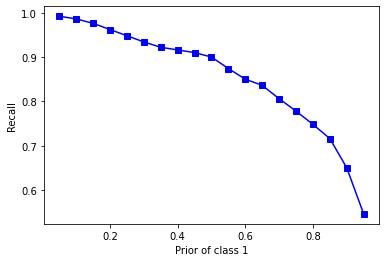

In [13]:
grid_search_recall  = GridSearchCV(gaussnb, tuned_parameters, cv=n_folds, scoring='recall')
grid_search_recall.fit(X, y)
scores_mean_recall = grid_search_recall.cv_results_['mean_test_score']
plt.plot(p,scores_mean_recall,'b-s')
plt.xlabel('Prior of class 1')
plt.ylabel('Recall')
plt.show()

**Q13: print the mean scores and the standard-deviation of all the tested models.**

In [14]:
scores_mean_ba = grid_search_ba.cv_results_['mean_test_score']
print(scores_mean_ba)

scores_std_ba = grid_search_ba.cv_results_['std_test_score']
print(scores_std_ba)

[0.7684 0.8204 0.848  0.8619 0.8714 0.8784 0.8824 0.8894 0.8957 0.897
 0.8906 0.8837 0.8831 0.8739 0.8654 0.8558 0.8452 0.8162 0.7689]
[0.0110109  0.01179152 0.01311488 0.0169142  0.01424921 0.00862786
 0.01106526 0.01198499 0.01183258 0.01738965 0.01985548 0.02934638
 0.02744249 0.02350085 0.02008084 0.02583331 0.02636968 0.02733423
 0.027508  ]


**Q14: print the priors of the best model. Does this best prior correspond to the prior of the training set?**

Answer: no, it does not. The prior of the training set is highly unbalanced [5000/5500,500/5500].

In [15]:
print("Best parameters set found on training set:")
print(grid_search_ba.best_params_)

Best parameters set found on training set:
{'priors': [0.49999999999999994, 0.5]}
